## Introducción

Como analista de datos, tu objetivo es **evaluar cómo la movilidad urbana se relaciona con la productividad económica en las principales ciudades latinoamericanas**.
Para ello trabajarás con datos reales de TomTom Traffic Index y OECD Cities, que deberás limpiar, combinar y analizar para identificar en qué ciudades conviene invertir en infraestructura de transporte.

## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de ambos datasets**.
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯Objetivo:**
Importar las librerías necesarias, cargar los archivos CSV en DataFrames y realizar una revisión preliminar para entender su contenido.

**Instrucciones:**
- Importa las librerías `pandas`, `numpy`, `seaborn` y `matplotlib.pyplot`.
- Carga los archivos usando `pd.read_csv()`:
  - `'/datasets/tomtom_traffic.csv'`
  - `/datasets/oecd_city_economy.csv` `.
- Guarda los DataFrames en las variables `traffic` y `eco`.
- Muestra las primeras 5 filas de cada DataFrame.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt# importar librerías

In [ ]:
# cargar archivos
traffic = pd.read_csv('/datasets/tomtom_traffic.csv')
eco = pd.read_csv('/datasets/oecd_city_economy.csv') #completa el código

In [ ]:
print("Dataset de trafico:")
print(traffic.head())# mostrar las primeras 5 filas de traffic

Dataset de trafico:
  Country       City            UpdateTimeUTC  JamsDelay  TrafficIndexLive  \
0     ARE  abu-dhabi  2025-01-13 04:01:30.001      650.7              36.0   
1     ARE  abu-dhabi  2025-01-13 03:46:00.000      540.4              30.0   
2     ARE  abu-dhabi  2025-01-13 02:46:30.000       71.8               7.0   
3     ARE  abu-dhabi  2025-01-13 01:46:30.001        8.2               2.0   
4     ARE  abu-dhabi  2025-01-13 00:01:30.000        1.1               1.0   

   JamsLengthInKms  JamsCount  TrafficIndexWeekAgo     UpdateTimeUTCWeekAgo  \
0            109.1      162.0                 30.0  2025-01-06 04:01:30.000   
1            101.4      136.0                 27.0  2025-01-06 03:46:30.001   
2             18.9       23.0                  6.0  2025-01-06 02:46:30.000   
3              4.1        2.0                  2.0  2025-01-06 01:46:30.000   
4              0.2        1.0                  1.0  2025-01-06 00:01:30.000   

   TravelTimeLivePer10KmsMins  Trave

In [ ]:
print("Dataset económico:")
print(eco.head())# mostrar las primeras 5 filas de eco

Dataset económico:
   Year            City    Country City GDP/capita Unemployment %  \
0  2023    buenos-aires  Argentina       15.782,00           6.2%   
1  2023       sao-paulo     Brazil       14.475,00           9.1%   
2  2023  rio-de-janeiro     Brazil       13.142,00           9.8%   
3  2023        brasilia     Brazil       15.999,00           8.3%   
4  2023        salvador     Brazil        8.761,00          13.1%   

  PM2.5 (μg/m³) Population (M)  
0          15,2          15,30  
1         29,50          22,50  
2         19,10          13,60  
3         13,50           4,70  
4         16,00           3,90  


**Tip:** Si no usas `print()` la tabla se vera mejor.


---

## 🧩Paso 2: Explorar, limpiar y preparar los datos

Antes de combinar los datasets, inspecciona su estructura, tipos de datos, columnas y valores faltantes.
Anota las columnas que necesiten limpieza y luego estandariza los nombres de columnas.

### 2.1 Explorar la estructura y tipos de datos

**🎯Objetivo:**
Identificar columnas con tipos incorrectos, distribución y nulos, anotar las columnas que requieren conversión.

**Instrucciones:**

- Usa `.info()` para conocer la estructura de ambos DataFrames.
- Muestra los primeros 3 renglones de cada DF.
- Identifica si los detalles de cada DF estan bien o si requieren correcciones y escribe tus conclusiones en el bloque Markdown.
  - ¿Hay columnas que requieren conversión?¿ Cuáles son? ¿Que tipo de dato ienen y cuál deberían de tener?
  - ¿Hay datos ausentes en alguna columna?


In [ ]:
print(traffic.info())# Examinar la estructura de traffic
traffic.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1004464 non-null  float64
dtype

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232


En la estructura del DF traffic, se observa que:
- Las columnas `UpdateTimeUTC` y `UpdateTimeUTC` son de tipo ...
- ...

In [ ]:
print(eco.info())# Examinar la estructura de eco
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB
None


,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"


En la estructura del DF eco, se observa que:
- Las columnas `City GDP/capita`, `Unemployment %`, ...
- ...

### 2.2 Renombrar columnas

**🎯Objetivo:**
Estandarizar los nombres de columnas para evitar errores y facilitar la unión de los datasets.

**Instrucciones:**

- Cambia los nombres de las columnas para que tengan el formato `snake_case`.
    - `Country` → `country`
    - `UpdateTimeUTC` → `update_time_utc`
- Verifica que los cambios se hayan aplicado correctamente usando `.columns`.


In [ ]:
traffic = traffic.rename(columns = {"Country": "country", "UpdateTimeUTC":"update_time_utc","City": "city","JamsDelay":"jams_delay","TrafficIndexLive":"traffic_index_live","JamsLengthInKms":"jams_length_in_kms","JamsCount":"jams_count","TrafficIndexWeekAgo":"traffic_index_week_ago","UpdateTimeUTCWeekAgo":"update_time_utc_week_ago","TravelTimeLivePer10KmsMins":"travel_time_live_per_10_kms_mins","TravelTimeHistoricPer10KmsMins":"travel_time_historic_per_10_kms_mins","MinsDelay":"mins_delay"})# Estandarizar los nombres de las columnas de traffic
#tu código aquí

# verificar cambios
traffic.columns

Index(['country', 'city', 'update_time_utc', 'jams_delay',
       'traffic_index_live', 'jams_length_in_kms', 'jams_count',
       'traffic_index_week_ago', 'update_time_utc_week_ago',
       'travel_time_live_per_10_kms_mins',
       'travel_time_historic_per_10_kms_mins', 'mins_delay'],
      dtype='object')

In [ ]:
eco= eco.rename(columns = {"Country":"country","Year":"year","City":"city","City GDP/capita":"city_gdp_capita","Unemployment %":"unemployment_pct","PM2.5 (μg/m³)":"pm2.5_μg/m³","Population (M)":"population_m"})# Estandarizar los nombres de las columnas de eco
#tu código aquí

# verificar cambios
eco.columns

Index(['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct',
       'pm2.5_μg/m³', 'population_m'],
      dtype='object')


### 2.3 Corregir formatos numéricos y de fecha

**🎯Objetivo:**
Asegurar que las columnas de fechas y valores numéricos estén en formatos correctos para permitir análisis, cálculos y comparaciones precisas.

**Instrucciones:**

- Convierte las columnas de fecha de `traffic` a formato `datetime`. Haz el cambio a prueba de errores.
- En el dataset `eco`, limpia los valores numéricos:
    - En `city_gdp_capita`: elimina separadores de miles (`.`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `unemployment_pct`: elimina el símbolo de porcentaje (`%`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `population_m`: reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
- Finalmente, crea una nueva columna llamada `population` multiplicando `population_m` por 1,000,000 para obtener la población total.


<details>
<summary>Haz clic para ver la pista</summary>
para eliminar símbolos, puedes reemplazarlos por un texto vacío.

In [ ]:
# Convertir las columnas de traffic a tipo fecha con pd.to_datetime()
traffic['update_time_utc'] = pd.to_datetime(traffic["update_time_utc"],errors = "coerce")#tu código aquí
traffic['update_time_utc_week_ago'] = pd.to_datetime(traffic["update_time_utc_week_ago"],errors = "coerce") #tu código aquí

# verificar el cambio
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                                Non-Null Count    Dtype         
---  ------                                --------------    -----         
 0   country                               1004464 non-null  object        
 1   city                                  1004464 non-null  object        
 2   update_time_utc                       1004464 non-null  datetime64[ns]
 3   jams_delay                            1004464 non-null  float64       
 4   traffic_index_live                    1004464 non-null  float64       
 5   jams_length_in_kms                    1004464 non-null  float64       
 6   jams_count                            1004464 non-null  float64       
 7   traffic_index_week_ago                1004464 non-null  float64       
 8   update_time_utc_week_ago              1004464 non-null  datetime64[ns]
 9   travel_time_live_per_10_kms_mins      1004464 

In [ ]:
# Limpia separadores y convierte columnas numéricas en eco
eco["city_gdp_capita"] = (
                          eco["city_gdp_capita"]
                         .astype(str)
                         .str.replace("." , "", regex=False)
                         .str.replace(",",".", regex=False))
eco["city_gdp_capita"] = pd.to_numeric(eco["city_gdp_capita"], errors = "coerce")

                         #....astype(str).str.replace('.', '').str.replace(',', '.').astype(float)

eco['unemployment_pct'] = (
                           eco["unemployment_pct"]
                          .astype(str)
                          .str.replace("%", "", regex=False)
                          .str.replace(",",".", regex=False))


eco["unemployment_pct"] = pd.to_numeric(eco["unemployment_pct"], errors="coerce")

eco["population_m"] = (
                       eco["population_m"]
                           .astype(str)
                           .str.replace(",",".", regex=False))

eco["population_m"] = pd.to_numeric(eco["population_m"], errors="coerce")



eco["population_m"] = eco["population_m"] * 1000000# Calcula la población total en unidades absolutas (Multiplica * 1000000)

# eco['population'] = ...

#eco[["population_m", "population"]].head() # verificar el cambio
#eco.info()
#eco.head(3)

In [ ]:
eco.head()

,year,city,country,city_gdp_capita,unemployment_pct,pm2.5_μg/m³,population_m
0,2023,buenos-aires,Argentina,15782.0,6.2,"15,2",15300000.0
1,2023,sao-paulo,Brazil,14475.0,9.1,"29,50",22500000.0
2,2023,rio-de-janeiro,Brazil,13142.0,9.8,"19,10",13600000.0
3,2023,brasilia,Brazil,15999.0,8.3,"13,50",4700000.0
4,2023,salvador,Brazil,8761.0,13.1,"16,00",3900000.0


In [ ]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              30 non-null     int64  
 1   city              30 non-null     object 
 2   country           30 non-null     object 
 3   city_gdp_capita   30 non-null     float64
 4   unemployment_pct  30 non-null     float64
 5   pm2.5_μg/m³       30 non-null     object 
 6   population_m      30 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.8+ KB



---

## 🧩Paso 3: Extraer año y filtrar

Extraer el año permite filtrar la información y trabajar solo con el período más reciente y relevante.

### 3.1 Extraer columna año y filtrar 2024

**🎯Objetivo**
Identificar el año de cada registro y mantener solo los registros del 2024.

**Intrucciones**

- Como el DataFrame `traffic` no tiene una columna de año, utiliza el atributo `.dt.year` sobre su columna de fecha para crear una nueva columna llamada `year`.
- Filtra las filas donde el año sea **2024**.
- Utiliza `.copy()` para crear dos nuevos DataFrames (`traffic_2024` y `eco_2024`) para evitar modificar el dataset original.

In [ ]:
# Extraer el año de las fechas en update_time_utc
traffic['year'] = traffic['update_time_utc'].dt.year

# Verificar cambio
traffic["year"].unique()

array([2025, 2024])

In [ ]:
# Filtra los registros del año 2024
traffic_2024 = traffic[traffic["year"] == 2024].copy()
eco_2024 = eco[eco["year"] == 2024].copy()

# Revisar dataframes nuevos
display(traffic_2024.head())
display(eco_2024.head())


,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins,mins_delay,year
302,ARE,abu-dhabi,2024-12-31 23:01:30.000,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001,8.560399,8.519634,0.040765,2024
303,ARE,abu-dhabi,2024-12-31 22:01:30.000,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30.000,10.355732,9.049445,1.306286,2024
304,ARE,abu-dhabi,2024-12-31 21:16:30.000,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30.000,11.456878,9.305174,2.151704,2024
305,ARE,abu-dhabi,2024-12-31 20:01:00.001,399.4,27.0,38.0,75.0,6.0,2024-12-24 20:01:30.001,11.670062,9.952811,1.717252,2024
306,ARE,abu-dhabi,2024-12-31 19:46:00.000,366.4,28.0,39.8,82.0,9.0,2024-12-24 19:01:00.000,11.686322,10.008469,1.677853,2024


,year,city,country,city_gdp_capita,unemployment_pct,pm2.5_μg/m³,population_m
15,2024,buenos-aires,Argentina,18117.0,7.2,"14,50",15400000.0
16,2024,sao-paulo,Brazil,14703.0,8.5,"28,00",22600000.0
17,2024,rio-de-janeiro,Brazil,13349.0,9.2,"18,40",13700000.0
18,2024,brasilia,Brazil,16251.0,7.8,"12,80",4800000.0
19,2024,salvador,Brazil,8899.0,12.4,"15,20",3900000.0



---

## 🧩Paso 4: Analizar y resumir datos de movilidad

Como el dataset de tráfico contiene **múltiples registros por ciudad**. En esta parte, calcularás los promedios anuales por ciudad para simplificar el análisis y obtener una visión más clara de las tendencias generales.

### 4.1 Calcular promedios de tráfico por ciudad

**🎯Objetivo:**
Obtener una vista consolidada del tráfico promedio por ciudad y año, para analizar patrones generales sin depender de datos diarios.

**Instrucciones**

- Agrupa los datos por `city`, `country` y `year`.
- Calcula el promedio **solo de las métricas de tráfico más relevantes**: como `jams_delay`, `traffic_index_live`, `jams_length_kms`, `jams_count`, `mins_delay`, y tiempos de viaje (`travel_time_live_per_10kms_mins` y `travel_time_hist_per_10kms_mins`).
- Guarda el resultado como `traffic_city_year_2024`, mantén las columnas como variables (no índices).


<details>
<summary>Haz clic para ver la pista</summary>
Usa ".agg()" para aplicar funciones de promedio. Al final, reinicia el índice para mantener las columnas de la agrupación como variables (no índices).

In [ ]:
# Calcular los  promedios de trafico por ciudad, país y año
traffic_city_year_2024 = traffic_2024.groupby(["city","country", "year"]).agg({"jams_delay":"mean",
                                                                              "traffic_index_live":"mean",
                                                                              "jams_length_in_kms":"mean",
                                                                              "jams_count":"mean",
                                                                              "mins_delay":"mean",
                                                                              "travel_time_live_per_10_kms_mins":"mean",
                                                                              "travel_time_historic_per_10_kms_mins":"mean"
                                                                               }).reset_index()

# Mostrar resultado
traffic_city_year_2024.head()

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins
0,a-coruna,ESP,2024,17.935187,15.259774,2.198002,4.934405,0.774172,16.267977,15.493804
1,aachen,DEU,2024,26.732141,20.960314,3.892586,6.601832,0.792968,13.397861,12.604894
2,aarhus,DNK,2024,21.200616,16.575891,2.736736,6.109987,0.495276,15.219292,14.724016
3,abu-dhabi,ARE,2024,171.157315,13.902028,24.507380,47.268019,0.139764,9.829092,9.689328
4,adana,TUR,2024,83.864761,22.541040,11.827331,23.754620,1.129749,15.879694,14.749945


### 🧠 **Momento de reflexión**

¡Excelente trabajo hasta aquí!

Ahora que ya tienes los promedios anuales por ciudad, es momento de **observarlos** con atención.

Piensa:

- ¿Cuál crees que tiene el mayor tiempo promedio de tráfico?
- ¿Será una ciudad de **Europa**, de **Latinoamérica** o de **otra región** del mundo?

Para descubrirlo, ejecuta esta línea de código:

`traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)`


🔍 Observa qué ciudad aparece en los primeros lugares.

¿Te sorprenden los resultados? , ¿Coinciden con lo que imaginabas?

In [ ]:
traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins
221,mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
352,tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
246,new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
200,london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
211,manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734
...,...,...,...,...,...,...,...,...,...,...
111,dunedin,NZL,2024,4.651175,15.430809,0.712315,1.591384,0.633294,16.226009,15.592715
363,uppsala,SWE,2024,4.194486,13.939168,0.656368,1.349672,0.501802,15.746717,15.244916
123,fujairah,ARE,2024,4.025959,10.907719,0.731910,1.373006,0.194951,11.662590,11.467639
12,almere,NLD,2024,3.633523,6.290478,0.506362,1.064063,-0.017544,9.467150,9.484694


La ciudad con el mayor tiempo promedio de tráfico es ...


---

## 🧩Paso 5: Unir movilidad y economía

Combinar datasets te permite analizar cómo se relacionan los indicadores económicos con los de movilidad.

### 5.1 Unir tráfico (tabla principal) con indicadores económicos

**🎯Objetivo:**
Combinar la información de tráfico y economía en un solo DataFrame para analizar cómo las condiciones económicas se relacionan con la movilidad urbana.

**Instrucciones**
- Selecciona solo las **columnas relevantes** de cada dataset (por ejemplo, variables clave de tráfico y de economía).
- Usa `.copy()` al crear subconjuntos para evitar modificar el dataset original.
- Une ambos DataFrames y define como **claves de unión** a `city` y `year`.
- Mantén solo las ciudades y años presentes en ambos datasets.
- Guarda el resultado en una nueva variable llamada `merged` y muestra las primeras 5 filas.


<details>
<summary>Haz clic para ver la pista</summary>
Aplica una unión de tipo "inner" para mantener las ciudades y años presentes en ambos datasets.

In [ ]:
# Seleccionar columnas clave de tráfico y economía
left_cols = ['city','country','year','jams_delay','traffic_index_live',
             'jams_length_in_kms','jams_count','mins_delay',
             'travel_time_live_per_10_kms_mins','travel_time_historic_per_10_kms_mins']

right_cols = ['city','year','city_gdp_capita','unemployment_pct','pm2.5_μg/m³','population_m']

# Usar .copy() para crear los dos nuevos datasets reducidos
traffic_2024_small = traffic_city_year_2024[left_cols].copy()
eco_2024_small = eco_2024[right_cols].copy()

# Unir datasets
merged = pd.merge(traffic_2024_small, eco_2024_small, on = ["city","year"], how="inner")# tu código aquí

# Mostrar las primeras 5 filas
merged.head()# tu código aquí

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins,city_gdp_capita,unemployment_pct,pm2.5_μg/m³,population_m
0,belo-horizonte,BRA,2024,263.047879,19.428946,44.038129,68.805422,0.487228,18.304538,17.817311,11124.0,9.5,"16,80",6100000.0
1,bogota,COL,2024,1141.552364,37.614273,140.893564,230.566550,1.699628,24.992185,23.292557,11442.0,10.0,"17,60",11300000.0
2,brasilia,BRA,2024,101.576326,11.258220,18.337133,27.280140,0.193442,13.338658,13.145216,16251.0,7.8,"12,80",4800000.0
3,buenos-aires,ARG,2024,571.089593,17.756012,100.287844,137.359860,0.416566,17.907916,17.491349,18117.0,7.2,"14,50",15400000.0
4,curitiba,BRA,2024,183.469274,14.954545,30.050044,46.898164,0.139965,17.258700,17.118736,12381.0,8.2,"13,50",3700000.0



---

## 🧩Paso 6: Visualización y análisis de relaciones

Ahora que tienes un dataset limpio y unificado, es momento de **visualizar patrones**.
Los gráficos te ayudarán a entender cómo se relacionan las variables económicas con las de movilidad urbana.

### 6.1 Visualizar relaciones entre economía y tráfico

**🎯Objetivo:**
Analizar visualmente la distribución y la relación entre indicadores de tráfico y economía en 2024, para identificar posibles patrones o tendencias generales entre ambas variables.

**Instrucciones**
- Usa las librerías `seaborn` y `matplotlib.pyplot` para generar los gráficos.
- Visualiza la distribución del **tráfico** (`jams_delay`) mediante:
    - **Boxplot** → para observar la media, mediana y detectar valores atípicos.
- Visualiza la distribución de la **economía** (`city_gdp_capita`) mediante:
    - **Histograma** → para analizar la forma de la distribución y el valor promedio del PIB per cápita.
- Finalmente, **compara ambas variables**, para observar si existe alguna relación entre ellas, haciendo un solo gráfico de barras donde aparezcan ambos indicadores.
- Recuerda agregar título y etiquetas a los ejes de tus gráficos.
- Observa y comenta los patrones, valores extremos o posibles relaciones que identifiques.

**Tip:** Dentro de los parentesis del boxplot, agrega `showmeans=True` para ver la media en el gráfico.

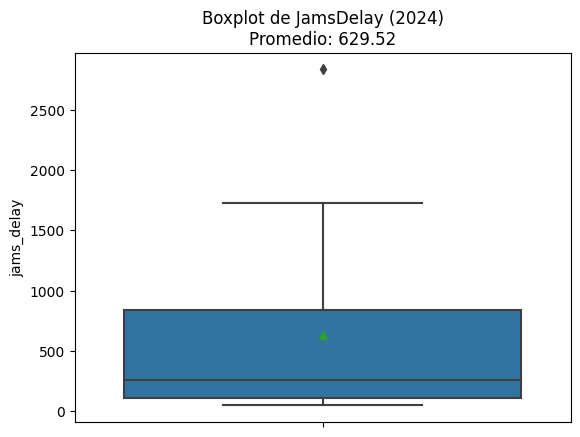

In [ ]:
# Crear boxplot para observar el comportamiento de los minutos de congestion JamsDelay
# crea tu gráfico
sns.boxplot(data=merged, y="jams_delay",showmeans=True)
mean_value = merged['jams_delay'].mean()
plt.title(f'Boxplot de JamsDelay (2024)\nPromedio: {mean_value:.2f}')
plt.show()


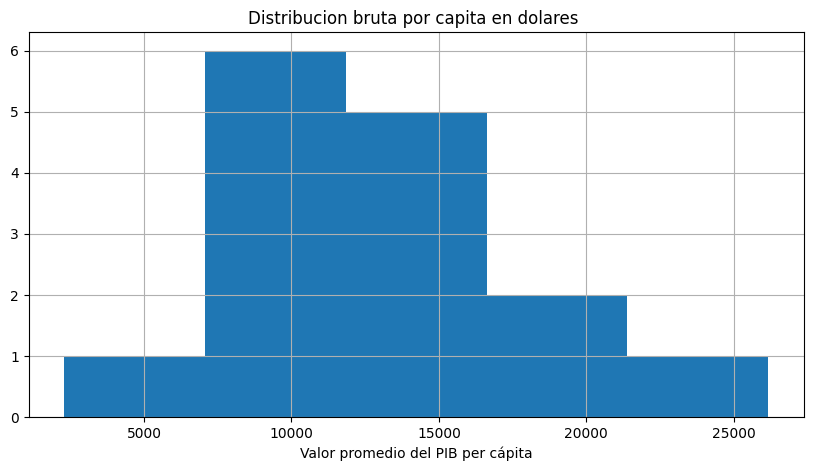

In [ ]:
# Crear histograma para ver la distribución de la economía (city_gdp_capita)
merged["city_gdp_capita"].hist(bins = 5, figsize = (10,5))
plt.title("Distribucion bruta por capita en dolares ")
plt.xlabel("Valor promedio del PIB per cápita")
plt.show()
#.mean_value = merged['jams_delay'].mean()


In [ ]:
dt_graficas= merged.groupby("city").agg({"jams_delay":"mean", "city_gdp_capita":"mean"}).reset_index()
dt_graficas

,city,jams_delay,city_gdp_capita
0,belo-horizonte,263.047879,11124.0
1,bogota,1141.552364,11442.0
2,brasilia,101.576326,16251.0
3,buenos-aires,571.089593,18117.0
4,curitiba,183.469274,12381.0
5,fortaleza,82.813181,8512.0
6,lima,1052.292789,13472.0
7,mexico-city,2833.057892,21111.0
8,montevideo,50.201092,26176.0
9,porto-alegre,139.382830,11801.0


In [ ]:
# Gráfico de barras para comparar jams_delay y city_gdp_capita por ciudad
df_graficas= dt_graficas.melt(id_vars= "city", value_vars=["jams_delay", "city_gdp_capita"])



df_graficas

,city,variable,value
0,belo-horizonte,jams_delay,263.047879
1,bogota,jams_delay,1141.552364
2,brasilia,jams_delay,101.576326
3,buenos-aires,jams_delay,571.089593
4,curitiba,jams_delay,183.469274
5,fortaleza,jams_delay,82.813181
6,lima,jams_delay,1052.292789
7,mexico-city,jams_delay,2833.057892
8,montevideo,jams_delay,50.201092
9,porto-alegre,jams_delay,139.382830


<AxesSubplot:xlabel='value', ylabel='city'>

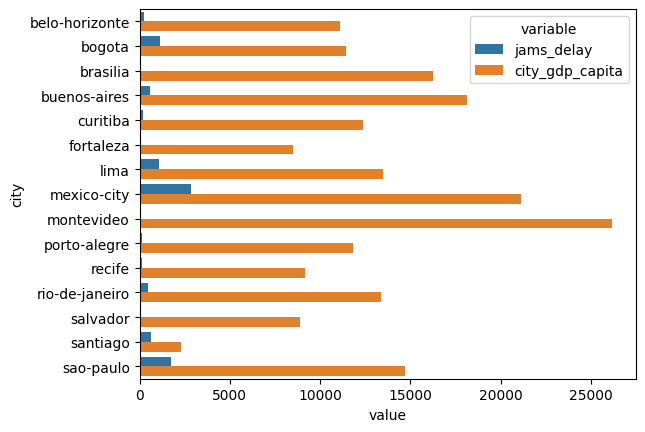

In [ ]:
sns.barplot(data=df_graficas,y="city",x="value",hue="variable")

**Tip:** Antes del `plt.show()` agrega el código `plt.xticks(rotation=90)` para rotar las etiquetas del eje X en 90 grados.

### 🧠 **Reflexiona**
Excelente trabajo llegando a esta etapa del análisis. Antes de avanzar, revisa tus gráficos, tómate un momento para pensar:

* ¿Las ciudades con mayor PIB per cápita también presentan más congestión?

* ¿O sucede lo contrario, o no existe una relación clara?


---

## 🧩Paso 7: Exportar y documentar resultados

En esta etapa final consolidarás todo tu trabajo: guardarás el dataset limpio y crearás un resumen que documente los resultados del proyecto.

### 7.1 Guardar dataset final

**🎯Objetivo:**
Generar un CSV limpio, reproducible y con columnas relevantes para análisis posterior.

**Instrucciones**

- Exporta el DataFrame `merged` con el nombre: `ladb_mobility_economy_2024_clean.csv`
- Usa `index=False` para no incluir el índice.


In [ ]:
# Exporta el dataset final como CSV
merged.to_csv("ladb_mobility_economy_2024_clean.csv", index=False)

Para poder ver o descargar el archivo generado:   
En el menú lateral que esta a la izquierda, ve hasta la parte de abajo, a la sección de **Exportar dataset** para más información.


---

## ✅ Entregables

1. **Notebook `.ipynb`** con todas las celdas (código + comentarios).
2. **CSV final**: `ladb_mobility_economy_2024_clean.csv`.
3. **Resumen ejecutivo breve** en Markdown (3–5 párrafos).



---

# 🧾 Resumen ejecutivo (plantilla)

> Completa este resumen al finalizar el análisis. Mantén 3–5 párrafos cortos, claros y accionables.

**Contexto & objetivo:**  
- Responde la pregunta central del análisis: ¿qué relación existe entre la movilidad urbana (congestión, tiempos de viaje) y la productividad económica (PIB per cápita)?
- ● La relacion urbana existe con la congestion y los tiempos de viaje y tiene un impacto significativo en la productividad economica. La congestion vehicular puede prolongar los tiempos de viaje y a su vez puede reducir la productividad laboral al aumentar el tiempo que los trabajadores pasan en el transporte.
- Explica brevemente las variables clave utilizadas y su relevancia para la toma de decisiones
  ● Jams_delay: (retraso por atascos): Identificar rutas crtiticas
  ● Traffic_index_lieve(Indice de Trafico en Vivo): Rutas Alternativas y semaforos inteligentes
  ● City_gdp_capita (Productividad economica promedio por habitante): Planificar y priorizar cuidades con mayor potencial para un crecimiento sostenible
**Cobertura de datos:**  
- Especifica los años analizados, número de ciudades y países incluidos.
  ● Analizamos el año 2024 en especifico con 7 paises y 15 cuidades.
**Metodología (alto nivel):**  
- Describe los procesos principales: limpieza de datos (formatos, estandarización de columnas)
- ● Aplicamos .remane para priorizar los nombres claros sobre los nombres cortos y en miscula para evitar categorias distintas.
- ● Convertimos los columnas de fecha de traffic a formato datetime por que estaban en el formato "object(texto generico)"
- ●Limpiamos los valores numericos eco: eliminamos separadores de miles(.), simbolo de (%) y remplanzmos "," por "." u " "
- Explica la agregación por ciudad–año y el uso de una unión INNER para integrar tráfico y economía.
- ●Filtramos la agregacion "City and Year" para decir que todas las Cuidades y Años se conserven y utilizamos la union del INNER JOIN para "Traffic_2024 y Eco_2024"
- Menciona las validaciones visuales empleadas (distribuciones, outliers, tendencias generales).
  ●Boxplot"Jams_delay"): presencia de valores atipicos(outliers),La media (629) está claramente por encima de la mediana. La cola superior es mucho más larga que la inferior → asimetría positiva: esto sugiere que la mayoría de los valores son bajos, pero existen retrasos muy grandes.
  ●Distribuciones (Histograma"City_gdp_capita"): Se observa una asimetria positiva, La mayor frecuencia de ciudades se agrupa aproximadamente entre 8,000 y 15,000 USD, indicando el rango típico del PIB per cápita.
  ●Analisis de Tendencias Generales ("jams_delay", "city_gdp_capita"):En la mayoría de las ciudades, el PIB per cápita es consistentemente alto mientras que los niveles de retraso son relativamente bajos, mostrando una tendencia general de estabilidad operativa.

**Hallazgos iniciales:**  
- Resume los patrones más importantes entre índices de tráfico y PIB per cápita.
- ● MEX, Mexico City-2024 "Trafico (Jams_delay): 2833.057892", "PIB per capita: 21111"
- ● BRA,Fortaleza-2024 "PIB per capita: 8512", "Trafico (Jams_delay): 82.81318102"
- ● URY, MonteVideo-2024 "PIB per capita: 26176","Trafico(Jams_delay): 50.20109218"
- Destaca anomalías u outliers que podrían requerir revisión adicional o un análisis más profundo.
**Recomendaciones**  
Aterriza los hallazgos en acciones: ciudades prioritarias, necesidad de validar fuentes, requerimiento de análisis adicionales, o propuestas de inversión.
 ● Cuidad prioritaria: Cuidad de Mexico-(MEX): Incorporarla como caso piloto para políticas de movilidad urbana.
 ● Prioridad Media: Fortaleza-(BRA): Analizar si el bajo tráfico responde a baja motorización   o buena planificación, Mantener monitoreo para prevenir deterioro futuro.
 ● URY: Usar como benchmark regional(referencia regional), identificar y documentar buenas      prácticas replicables.
- ¿Qué ciudad : Bogotá, Lima o Buenos Aires o alguna otra en particular, muestra la mayor correlación significativa entre altos niveles de congestión vehicular y bajos indicadores de productividad económica, sugiriendo ser una ciudad prioritaria para inversión en infraestructura de transporte? BOGOTA ¿porque?
Congestión Crítica: 1141.55 minutos de retraso (3ra más alta)
PIB Relativamente Bajo: $11,442 per cápita
Gran Población: 11.3 millones de habitantes
Impacto Potencial Máximo: Mejorar movilidad podría liberar mucha productividad
